# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [4]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

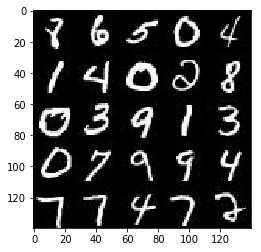

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

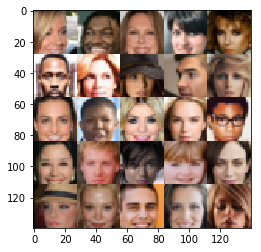

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/juewang/anaconda/envs/dog-project/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [8]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_image_tensor = tf.placeholder(dtype=tf.float32, shape=(None, image_width, image_height, image_channels))
    z_data_tensor = tf.placeholder(dtype=tf.float32, shape = (None, z_dim))
    learning_rate = tf.placeholder(dtype = tf.float32)
    

    return input_image_tensor, z_data_tensor, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [41]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    dropout = 0.4
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        layer1 = tf.layers.conv2d(images, filters = 64, kernel_size = 5, strides=2, padding='same')
        layer1 = tf.maximum(alpha * layer1, layer1)
        
        layer2 = tf.layers.conv2d(layer1, filters = 128, kernel_size = 5, strides=2, padding='same')
        layer2 = tf.layers.batch_normalization(layer2, training=True)
        lyaer2 = tf.maximum(alpha * layer2, layer2)
        
        layer3 = tf.layers.conv2d(layer2, filters = 256, kernel_size = 5, strides=2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=True)
        layer3 = tf.maximum(alpha * layer3, layer3)

        flat = tf.reshape(layer3, (-1, 8*8*256))
        dropout_layer = tf.layers.dropout(inputs=flat, rate=dropout)
        logits = tf.layers.dense(dropout_layer, 1)
        output = tf.sigmoid(logits)
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [43]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse= not is_train):
        layer1 = tf.layers.dense(z, 7*7*512)
        layer1 = tf.reshape(layer1, (-1, 7, 7, 512))
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        print(layer1.shape)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 128, kernel_size=5, strides=2, padding='same')
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
        print(layer2.shape)
        
        layer3 = tf.layers.conv2d_transpose(layer2, 64, kernel_size=5, strides=2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(alpha * layer3, layer3)
        print(layer3.shape)

        logits = tf.layers.conv2d_transpose(layer3, out_channel_dim, kernel_size=5,strides=1, padding='same')
        print(logits.shape)
        out = tf.tanh(logits)
        print(out.shape)
        return out

    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 5)
(?, 28, 28, 5)
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 5)
(?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [34]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_out = generator(input_z, out_channel_dim, is_train=True)
    d_real_out, d_real_logits = discriminator(input_real)
    d_fake_out, d_fake_logits = discriminator(g_out, reuse=True)
    
    smooth = 0.1
    real_labels = tf.ones_like(d_real_out) * (1 - smooth)
    fake_labels = tf.zeros_like(d_fake_out)
    g_labels    = tf.ones_like(d_fake_out)

    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits, labels=real_labels))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=fake_labels))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=g_labels))

    d_loss = d_real_loss + d_fake_loss
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 4)
(?, 28, 28, 4)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [35]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

The following code refered from: https://github.com/RomelTorres/DLND-face-generation


In [37]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_step = 10
    show_step = 100
    dropout = 0.75
    images_to_show = 9
    losses =[]
    step = 0
    
    _, width, height, channels = data_shape
    r_input, z_input, lr = model_inputs(width, height, channels, z_dim)
    
    d_loss, g_loss = model_loss(r_input, z_input, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    print("Starting trainning")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                step += 1
                batch_images = 2*batch_images
                z_batch = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_opt, feed_dict={r_input: batch_images, z_input: z_batch, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={z_input: z_batch, r_input: batch_images, lr: learning_rate})
                
                if step % print_step == 0:
                    train_loss_d = d_loss.eval({z_input: z_batch, r_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_batch})
                    
                    print("Step: {}:".format(step),
                          "Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if step % show_step == 0:
                    show_generator_output(sess, images_to_show, z_input, channels, data_image_mode)
    print("Finished with trainning")

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)
Starting trainning
Step: 10: Epoch 1/2... Discriminator Loss: 5.0302... Generator Loss: 0.0128
Step: 20: Epoch 1/2... Discriminator Loss: 4.7892... Generator Loss: 0.0166
Step: 30: Epoch 1/2... Discriminator Loss: 4.2561... Generator Loss: 0.0382
Step: 40: Epoch 1/2... Discriminator Loss: 3.4455... Generator Loss: 0.0715
Step: 50: Epoch 1/2... Discriminator Loss: 2.9540... Generator Loss: 0.1388
Step: 60: Epoch 1/2... Discriminator Loss: 2.8045... Generator Loss: 0.1015
Step: 70: Epoch 1/2... Discriminator Loss: 2.1763... Generator Loss: 0.2353
Step: 80: Epoch 1/2... Discriminator Loss: 2.1680... Generator Loss: 0.2475
Step: 90: Epoch 1/2... Discriminator Loss: 2.3530... Generator Loss: 0.2063
Step: 100: Epoch 1/2... Discriminator Loss: 2.5818... Generator Loss: 0.1319
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


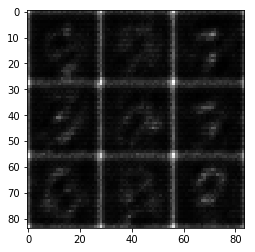

Step: 110: Epoch 1/2... Discriminator Loss: 2.3902... Generator Loss: 0.1778
Step: 120: Epoch 1/2... Discriminator Loss: 2.1643... Generator Loss: 0.4596
Step: 130: Epoch 1/2... Discriminator Loss: 2.4025... Generator Loss: 0.1835
Step: 140: Epoch 1/2... Discriminator Loss: 2.2099... Generator Loss: 0.2441
Step: 150: Epoch 1/2... Discriminator Loss: 1.6699... Generator Loss: 0.7573
Step: 160: Epoch 1/2... Discriminator Loss: 2.0326... Generator Loss: 0.2609
Step: 170: Epoch 1/2... Discriminator Loss: 1.6123... Generator Loss: 0.4560
Step: 180: Epoch 1/2... Discriminator Loss: 2.0663... Generator Loss: 0.2145
Step: 190: Epoch 1/2... Discriminator Loss: 1.8192... Generator Loss: 0.3164
Step: 200: Epoch 1/2... Discriminator Loss: 1.7488... Generator Loss: 0.4332
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


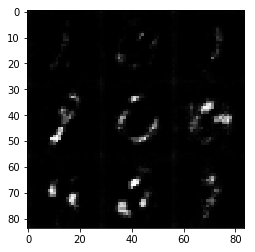

Step: 210: Epoch 1/2... Discriminator Loss: 1.6085... Generator Loss: 0.5307
Step: 220: Epoch 1/2... Discriminator Loss: 1.6271... Generator Loss: 0.4124
Step: 230: Epoch 1/2... Discriminator Loss: 1.5879... Generator Loss: 1.0180
Step: 240: Epoch 1/2... Discriminator Loss: 1.6497... Generator Loss: 0.3731
Step: 250: Epoch 1/2... Discriminator Loss: 1.5658... Generator Loss: 0.4384
Step: 260: Epoch 1/2... Discriminator Loss: 1.7066... Generator Loss: 0.3409
Step: 270: Epoch 1/2... Discriminator Loss: 1.8062... Generator Loss: 0.2964
Step: 280: Epoch 1/2... Discriminator Loss: 1.5443... Generator Loss: 0.4027
Step: 290: Epoch 1/2... Discriminator Loss: 1.9208... Generator Loss: 0.2950
Step: 300: Epoch 1/2... Discriminator Loss: 1.8143... Generator Loss: 0.3239
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


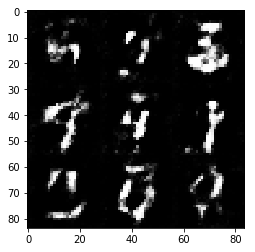

Step: 310: Epoch 1/2... Discriminator Loss: 1.3415... Generator Loss: 0.7068
Step: 320: Epoch 1/2... Discriminator Loss: 1.1889... Generator Loss: 1.7653
Step: 330: Epoch 1/2... Discriminator Loss: 1.6052... Generator Loss: 0.4010
Step: 340: Epoch 1/2... Discriminator Loss: 1.5350... Generator Loss: 0.4377
Step: 350: Epoch 1/2... Discriminator Loss: 1.8542... Generator Loss: 0.3151
Step: 360: Epoch 1/2... Discriminator Loss: 1.4230... Generator Loss: 0.6780
Step: 370: Epoch 1/2... Discriminator Loss: 1.0800... Generator Loss: 0.9171
Step: 380: Epoch 1/2... Discriminator Loss: 1.5696... Generator Loss: 0.4960
Step: 390: Epoch 1/2... Discriminator Loss: 1.5332... Generator Loss: 0.7027
Step: 400: Epoch 1/2... Discriminator Loss: 1.6355... Generator Loss: 0.3905
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


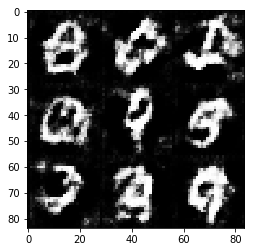

Step: 410: Epoch 1/2... Discriminator Loss: 1.6539... Generator Loss: 0.3531
Step: 420: Epoch 1/2... Discriminator Loss: 1.4855... Generator Loss: 1.2121
Step: 430: Epoch 1/2... Discriminator Loss: 1.8815... Generator Loss: 0.2569
Step: 440: Epoch 1/2... Discriminator Loss: 1.7810... Generator Loss: 0.3618
Step: 450: Epoch 1/2... Discriminator Loss: 1.4807... Generator Loss: 0.4321
Step: 460: Epoch 1/2... Discriminator Loss: 1.5982... Generator Loss: 1.3270
Step: 470: Epoch 1/2... Discriminator Loss: 1.4722... Generator Loss: 1.6737
Step: 480: Epoch 1/2... Discriminator Loss: 2.0287... Generator Loss: 0.2422
Step: 490: Epoch 1/2... Discriminator Loss: 1.5615... Generator Loss: 0.4237
Step: 500: Epoch 1/2... Discriminator Loss: 1.7915... Generator Loss: 0.2945
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


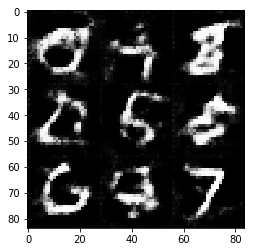

Step: 510: Epoch 1/2... Discriminator Loss: 1.4524... Generator Loss: 1.6602
Step: 520: Epoch 1/2... Discriminator Loss: 2.0242... Generator Loss: 0.2481
Step: 530: Epoch 1/2... Discriminator Loss: 1.6657... Generator Loss: 0.4399
Step: 540: Epoch 1/2... Discriminator Loss: 1.2477... Generator Loss: 0.9596
Step: 550: Epoch 1/2... Discriminator Loss: 1.4722... Generator Loss: 0.4735
Step: 560: Epoch 1/2... Discriminator Loss: 1.7255... Generator Loss: 0.3294
Step: 570: Epoch 1/2... Discriminator Loss: 1.6309... Generator Loss: 1.8800
Step: 580: Epoch 1/2... Discriminator Loss: 1.3813... Generator Loss: 0.6441
Step: 590: Epoch 1/2... Discriminator Loss: 1.3404... Generator Loss: 0.5116
Step: 600: Epoch 1/2... Discriminator Loss: 1.3304... Generator Loss: 0.6374
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


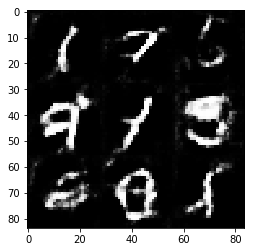

Step: 610: Epoch 1/2... Discriminator Loss: 1.2220... Generator Loss: 1.3235
Step: 620: Epoch 1/2... Discriminator Loss: 1.5833... Generator Loss: 2.1440
Step: 630: Epoch 1/2... Discriminator Loss: 2.0371... Generator Loss: 0.2081
Step: 640: Epoch 1/2... Discriminator Loss: 2.0056... Generator Loss: 0.2272
Step: 650: Epoch 1/2... Discriminator Loss: 1.2331... Generator Loss: 0.9876
Step: 660: Epoch 1/2... Discriminator Loss: 1.3470... Generator Loss: 1.2583
Step: 670: Epoch 1/2... Discriminator Loss: 1.4523... Generator Loss: 0.5870
Step: 680: Epoch 1/2... Discriminator Loss: 1.2566... Generator Loss: 1.1061
Step: 690: Epoch 1/2... Discriminator Loss: 1.6138... Generator Loss: 0.4219
Step: 700: Epoch 1/2... Discriminator Loss: 1.4189... Generator Loss: 1.5598
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


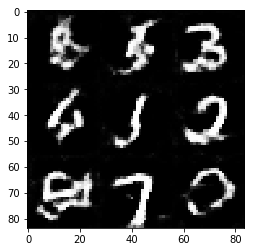

Step: 710: Epoch 1/2... Discriminator Loss: 1.1175... Generator Loss: 1.0691
Step: 720: Epoch 1/2... Discriminator Loss: 1.5293... Generator Loss: 0.4859
Step: 730: Epoch 1/2... Discriminator Loss: 1.4818... Generator Loss: 0.4367
Step: 740: Epoch 1/2... Discriminator Loss: 1.8275... Generator Loss: 0.2949
Step: 750: Epoch 1/2... Discriminator Loss: 1.3218... Generator Loss: 0.5480
Step: 760: Epoch 1/2... Discriminator Loss: 1.2274... Generator Loss: 0.8050
Step: 770: Epoch 1/2... Discriminator Loss: 1.3558... Generator Loss: 0.8964
Step: 780: Epoch 1/2... Discriminator Loss: 1.5662... Generator Loss: 0.4078
Step: 790: Epoch 1/2... Discriminator Loss: 1.3176... Generator Loss: 0.8816
Step: 800: Epoch 1/2... Discriminator Loss: 1.2640... Generator Loss: 1.2408
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


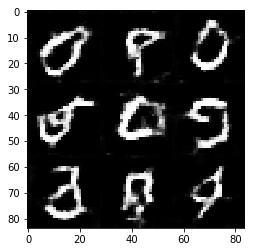

Step: 810: Epoch 1/2... Discriminator Loss: 1.8365... Generator Loss: 0.2820
Step: 820: Epoch 1/2... Discriminator Loss: 1.2813... Generator Loss: 0.5925
Step: 830: Epoch 1/2... Discriminator Loss: 1.3508... Generator Loss: 0.5255
Step: 840: Epoch 1/2... Discriminator Loss: 1.1057... Generator Loss: 0.9337
Step: 850: Epoch 1/2... Discriminator Loss: 1.1088... Generator Loss: 1.0427
Step: 860: Epoch 1/2... Discriminator Loss: 1.5703... Generator Loss: 0.4209
Step: 870: Epoch 1/2... Discriminator Loss: 1.1272... Generator Loss: 0.9768
Step: 880: Epoch 1/2... Discriminator Loss: 1.3952... Generator Loss: 0.5253
Step: 890: Epoch 1/2... Discriminator Loss: 1.3771... Generator Loss: 2.1829
Step: 900: Epoch 1/2... Discriminator Loss: 1.1481... Generator Loss: 0.8075
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


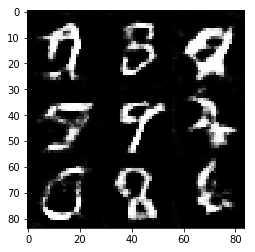

Step: 910: Epoch 1/2... Discriminator Loss: 1.5829... Generator Loss: 0.3853
Step: 920: Epoch 1/2... Discriminator Loss: 1.1092... Generator Loss: 1.5793
Step: 930: Epoch 1/2... Discriminator Loss: 1.3256... Generator Loss: 0.6281
Step: 940: Epoch 2/2... Discriminator Loss: 1.2950... Generator Loss: 0.5477
Step: 950: Epoch 2/2... Discriminator Loss: 3.0486... Generator Loss: 0.0954
Step: 960: Epoch 2/2... Discriminator Loss: 1.3263... Generator Loss: 0.5668
Step: 970: Epoch 2/2... Discriminator Loss: 1.4520... Generator Loss: 0.4609
Step: 980: Epoch 2/2... Discriminator Loss: 1.4875... Generator Loss: 0.4472
Step: 990: Epoch 2/2... Discriminator Loss: 1.6148... Generator Loss: 0.4549
Step: 1000: Epoch 2/2... Discriminator Loss: 0.8740... Generator Loss: 1.4457
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


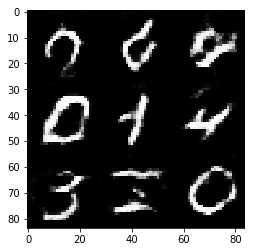

Step: 1010: Epoch 2/2... Discriminator Loss: 1.0744... Generator Loss: 0.7859
Step: 1020: Epoch 2/2... Discriminator Loss: 1.8384... Generator Loss: 0.3217
Step: 1030: Epoch 2/2... Discriminator Loss: 2.5512... Generator Loss: 0.1557
Step: 1040: Epoch 2/2... Discriminator Loss: 1.4458... Generator Loss: 0.4821
Step: 1050: Epoch 2/2... Discriminator Loss: 1.3246... Generator Loss: 0.5226
Step: 1060: Epoch 2/2... Discriminator Loss: 1.4858... Generator Loss: 0.4211
Step: 1070: Epoch 2/2... Discriminator Loss: 1.2590... Generator Loss: 0.6420
Step: 1080: Epoch 2/2... Discriminator Loss: 1.5287... Generator Loss: 0.5031
Step: 1090: Epoch 2/2... Discriminator Loss: 1.0951... Generator Loss: 0.7582
Step: 1100: Epoch 2/2... Discriminator Loss: 1.4096... Generator Loss: 0.5217
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


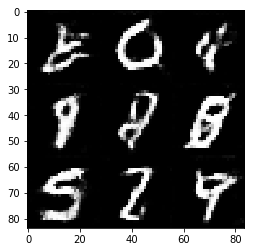

Step: 1110: Epoch 2/2... Discriminator Loss: 1.3714... Generator Loss: 0.5097
Step: 1120: Epoch 2/2... Discriminator Loss: 1.8957... Generator Loss: 0.2632
Step: 1130: Epoch 2/2... Discriminator Loss: 1.5060... Generator Loss: 0.4529
Step: 1140: Epoch 2/2... Discriminator Loss: 1.1073... Generator Loss: 0.7428
Step: 1150: Epoch 2/2... Discriminator Loss: 1.0802... Generator Loss: 0.8199
Step: 1160: Epoch 2/2... Discriminator Loss: 1.5746... Generator Loss: 0.4093
Step: 1170: Epoch 2/2... Discriminator Loss: 1.2170... Generator Loss: 0.6164
Step: 1180: Epoch 2/2... Discriminator Loss: 0.8419... Generator Loss: 1.1976
Step: 1190: Epoch 2/2... Discriminator Loss: 1.2132... Generator Loss: 0.7818
Step: 1200: Epoch 2/2... Discriminator Loss: 1.0171... Generator Loss: 1.6727
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


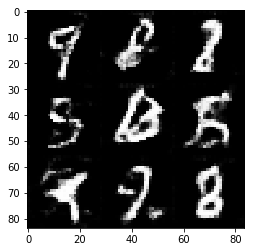

Step: 1210: Epoch 2/2... Discriminator Loss: 1.5171... Generator Loss: 0.4130
Step: 1220: Epoch 2/2... Discriminator Loss: 1.1890... Generator Loss: 0.6356
Step: 1230: Epoch 2/2... Discriminator Loss: 1.1939... Generator Loss: 2.0031
Step: 1240: Epoch 2/2... Discriminator Loss: 1.3515... Generator Loss: 0.6030
Step: 1250: Epoch 2/2... Discriminator Loss: 1.3534... Generator Loss: 0.5449
Step: 1260: Epoch 2/2... Discriminator Loss: 1.1422... Generator Loss: 0.7785
Step: 1270: Epoch 2/2... Discriminator Loss: 1.1252... Generator Loss: 0.7186
Step: 1280: Epoch 2/2... Discriminator Loss: 1.0432... Generator Loss: 0.9237
Step: 1290: Epoch 2/2... Discriminator Loss: 1.4566... Generator Loss: 0.4430
Step: 1300: Epoch 2/2... Discriminator Loss: 0.9626... Generator Loss: 1.0403
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


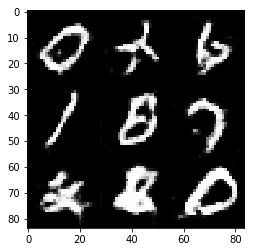

Step: 1310: Epoch 2/2... Discriminator Loss: 1.1811... Generator Loss: 0.6744
Step: 1320: Epoch 2/2... Discriminator Loss: 1.7126... Generator Loss: 0.3477
Step: 1330: Epoch 2/2... Discriminator Loss: 2.7496... Generator Loss: 0.1465
Step: 1340: Epoch 2/2... Discriminator Loss: 0.8183... Generator Loss: 1.8027
Step: 1350: Epoch 2/2... Discriminator Loss: 1.2706... Generator Loss: 0.6199
Step: 1360: Epoch 2/2... Discriminator Loss: 1.7705... Generator Loss: 0.2988
Step: 1370: Epoch 2/2... Discriminator Loss: 1.1442... Generator Loss: 0.6854
Step: 1380: Epoch 2/2... Discriminator Loss: 2.0727... Generator Loss: 2.6859
Step: 1390: Epoch 2/2... Discriminator Loss: 1.0159... Generator Loss: 0.8338
Step: 1400: Epoch 2/2... Discriminator Loss: 1.3758... Generator Loss: 0.6043
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


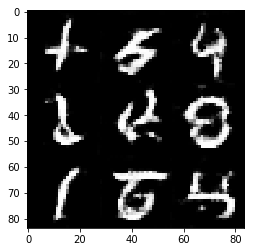

Step: 1410: Epoch 2/2... Discriminator Loss: 0.9800... Generator Loss: 1.1077
Step: 1420: Epoch 2/2... Discriminator Loss: 1.1293... Generator Loss: 0.6906
Step: 1430: Epoch 2/2... Discriminator Loss: 1.4206... Generator Loss: 0.4465
Step: 1440: Epoch 2/2... Discriminator Loss: 2.1730... Generator Loss: 0.2244
Step: 1450: Epoch 2/2... Discriminator Loss: 1.0787... Generator Loss: 0.8142
Step: 1460: Epoch 2/2... Discriminator Loss: 2.3101... Generator Loss: 0.1917
Step: 1470: Epoch 2/2... Discriminator Loss: 0.9997... Generator Loss: 0.8566
Step: 1480: Epoch 2/2... Discriminator Loss: 1.0355... Generator Loss: 1.4135
Step: 1490: Epoch 2/2... Discriminator Loss: 1.4418... Generator Loss: 0.4520
Step: 1500: Epoch 2/2... Discriminator Loss: 0.9294... Generator Loss: 1.0332
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


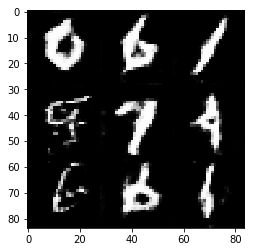

Step: 1510: Epoch 2/2... Discriminator Loss: 2.9731... Generator Loss: 0.1251
Step: 1520: Epoch 2/2... Discriminator Loss: 0.9599... Generator Loss: 0.9569
Step: 1530: Epoch 2/2... Discriminator Loss: 1.9547... Generator Loss: 0.2379
Step: 1540: Epoch 2/2... Discriminator Loss: 1.5781... Generator Loss: 0.4762
Step: 1550: Epoch 2/2... Discriminator Loss: 1.5523... Generator Loss: 0.4775
Step: 1560: Epoch 2/2... Discriminator Loss: 0.9284... Generator Loss: 1.1255
Step: 1570: Epoch 2/2... Discriminator Loss: 1.5946... Generator Loss: 0.4331
Step: 1580: Epoch 2/2... Discriminator Loss: 1.5514... Generator Loss: 1.0846
Step: 1590: Epoch 2/2... Discriminator Loss: 1.2723... Generator Loss: 1.6800
Step: 1600: Epoch 2/2... Discriminator Loss: 0.8673... Generator Loss: 1.1736
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


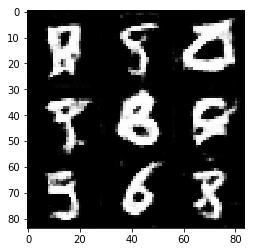

Step: 1610: Epoch 2/2... Discriminator Loss: 1.3196... Generator Loss: 0.5180
Step: 1620: Epoch 2/2... Discriminator Loss: 1.0079... Generator Loss: 1.1094
Step: 1630: Epoch 2/2... Discriminator Loss: 0.9827... Generator Loss: 1.0730
Step: 1640: Epoch 2/2... Discriminator Loss: 1.4051... Generator Loss: 0.4663
Step: 1650: Epoch 2/2... Discriminator Loss: 1.8087... Generator Loss: 0.3120
Step: 1660: Epoch 2/2... Discriminator Loss: 1.0550... Generator Loss: 0.9204
Step: 1670: Epoch 2/2... Discriminator Loss: 1.9320... Generator Loss: 0.3236
Step: 1680: Epoch 2/2... Discriminator Loss: 1.4863... Generator Loss: 0.4357
Step: 1690: Epoch 2/2... Discriminator Loss: 1.0962... Generator Loss: 0.8447
Step: 1700: Epoch 2/2... Discriminator Loss: 1.7377... Generator Loss: 0.3737
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


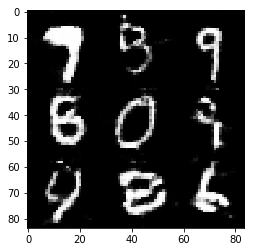

Step: 1710: Epoch 2/2... Discriminator Loss: 1.8453... Generator Loss: 0.2919
Step: 1720: Epoch 2/2... Discriminator Loss: 0.9872... Generator Loss: 1.5215
Step: 1730: Epoch 2/2... Discriminator Loss: 0.8069... Generator Loss: 1.4008
Step: 1740: Epoch 2/2... Discriminator Loss: 1.8194... Generator Loss: 0.2920
Step: 1750: Epoch 2/2... Discriminator Loss: 1.2892... Generator Loss: 0.6675
Step: 1760: Epoch 2/2... Discriminator Loss: 1.1150... Generator Loss: 0.7230
Step: 1770: Epoch 2/2... Discriminator Loss: 0.7030... Generator Loss: 1.8196
Step: 1780: Epoch 2/2... Discriminator Loss: 0.9033... Generator Loss: 1.1485
Step: 1790: Epoch 2/2... Discriminator Loss: 1.0696... Generator Loss: 2.4280
Step: 1800: Epoch 2/2... Discriminator Loss: 0.9410... Generator Loss: 0.9425
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)


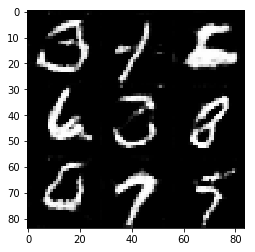

Step: 1810: Epoch 2/2... Discriminator Loss: 1.6959... Generator Loss: 0.4543
Step: 1820: Epoch 2/2... Discriminator Loss: 1.3726... Generator Loss: 0.4897
Step: 1830: Epoch 2/2... Discriminator Loss: 1.1567... Generator Loss: 2.4907
Step: 1840: Epoch 2/2... Discriminator Loss: 0.7545... Generator Loss: 1.7617
Step: 1850: Epoch 2/2... Discriminator Loss: 0.9546... Generator Loss: 1.4572
Step: 1860: Epoch 2/2... Discriminator Loss: 1.0318... Generator Loss: 0.8093
Step: 1870: Epoch 2/2... Discriminator Loss: 1.2809... Generator Loss: 0.5802
Finished with trainning


In [44]:
batch_size = 64
z_dim = 180
learning_rate = 0.0002
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)
Starting trainning
Step: 10: Epoch 1/1... Discriminator Loss: 4.9957... Generator Loss: 0.0155
Step: 20: Epoch 1/1... Discriminator Loss: 3.6240... Generator Loss: 0.0664
Step: 30: Epoch 1/1... Discriminator Loss: 5.0140... Generator Loss: 0.0215
Step: 40: Epoch 1/1... Discriminator Loss: 4.9268... Generator Loss: 0.0209
Step: 50: Epoch 1/1... Discriminator Loss: 4.1265... Generator Loss: 0.0361
Step: 60: Epoch 1/1... Discriminator Loss: 2.5203... Generator Loss: 0.2531
Step: 70: Epoch 1/1... Discriminator Loss: 3.3005... Generator Loss: 0.0659
Step: 80: Epoch 1/1... Discriminator Loss: 3.5133... Generator Loss: 0.0572
Step: 90: Epoch 1/1... Discriminator Loss: 2.4519... Generator Loss: 0.2619
Step: 100: Epoch 1/1... Discriminator Loss: 1.9829... Generator Loss: 0.2643
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


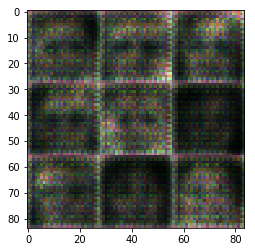

Step: 110: Epoch 1/1... Discriminator Loss: 2.2078... Generator Loss: 0.2671
Step: 120: Epoch 1/1... Discriminator Loss: 1.2333... Generator Loss: 0.7497
Step: 130: Epoch 1/1... Discriminator Loss: 2.1960... Generator Loss: 0.1919
Step: 140: Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 1.5841
Step: 150: Epoch 1/1... Discriminator Loss: 1.6233... Generator Loss: 0.4790
Step: 160: Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.5685
Step: 170: Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.6892
Step: 180: Epoch 1/1... Discriminator Loss: 2.4757... Generator Loss: 0.1535
Step: 190: Epoch 1/1... Discriminator Loss: 1.3132... Generator Loss: 3.1155
Step: 200: Epoch 1/1... Discriminator Loss: 1.2978... Generator Loss: 2.3194
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


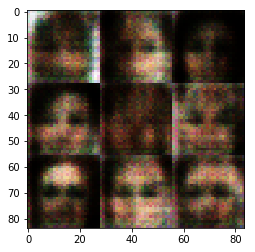

Step: 210: Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.5555
Step: 220: Epoch 1/1... Discriminator Loss: 0.8223... Generator Loss: 2.3846
Step: 230: Epoch 1/1... Discriminator Loss: 1.1989... Generator Loss: 0.7182
Step: 240: Epoch 1/1... Discriminator Loss: 2.4783... Generator Loss: 3.9929
Step: 250: Epoch 1/1... Discriminator Loss: 0.8783... Generator Loss: 1.4268
Step: 260: Epoch 1/1... Discriminator Loss: 2.0552... Generator Loss: 0.2471
Step: 270: Epoch 1/1... Discriminator Loss: 1.0960... Generator Loss: 0.8047
Step: 280: Epoch 1/1... Discriminator Loss: 0.8060... Generator Loss: 1.3558
Step: 290: Epoch 1/1... Discriminator Loss: 0.6340... Generator Loss: 1.7038
Step: 300: Epoch 1/1... Discriminator Loss: 0.6844... Generator Loss: 1.4764
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


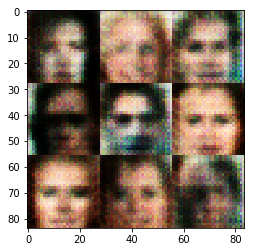

Step: 310: Epoch 1/1... Discriminator Loss: 0.4588... Generator Loss: 2.6487
Step: 320: Epoch 1/1... Discriminator Loss: 0.7767... Generator Loss: 1.1940
Step: 330: Epoch 1/1... Discriminator Loss: 1.0245... Generator Loss: 0.8553
Step: 340: Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.4886
Step: 350: Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.5620
Step: 360: Epoch 1/1... Discriminator Loss: 1.5609... Generator Loss: 0.4330
Step: 370: Epoch 1/1... Discriminator Loss: 0.5648... Generator Loss: 1.8824
Step: 380: Epoch 1/1... Discriminator Loss: 0.7629... Generator Loss: 1.3363
Step: 390: Epoch 1/1... Discriminator Loss: 1.9137... Generator Loss: 0.3894
Step: 400: Epoch 1/1... Discriminator Loss: 1.7169... Generator Loss: 0.3775
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


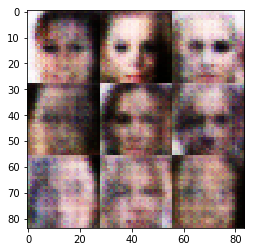

Step: 410: Epoch 1/1... Discriminator Loss: 1.1905... Generator Loss: 1.2781
Step: 420: Epoch 1/1... Discriminator Loss: 0.9059... Generator Loss: 1.0557
Step: 430: Epoch 1/1... Discriminator Loss: 0.7047... Generator Loss: 1.5328
Step: 440: Epoch 1/1... Discriminator Loss: 2.3953... Generator Loss: 0.2135
Step: 450: Epoch 1/1... Discriminator Loss: 2.2667... Generator Loss: 0.2130
Step: 460: Epoch 1/1... Discriminator Loss: 1.1836... Generator Loss: 0.6999
Step: 470: Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.6163
Step: 480: Epoch 1/1... Discriminator Loss: 0.9676... Generator Loss: 0.9956
Step: 490: Epoch 1/1... Discriminator Loss: 1.6119... Generator Loss: 0.3791
Step: 500: Epoch 1/1... Discriminator Loss: 0.8104... Generator Loss: 1.4932
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


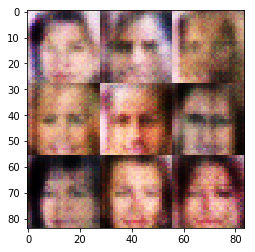

Step: 510: Epoch 1/1... Discriminator Loss: 1.0260... Generator Loss: 1.5503
Step: 520: Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.5404
Step: 530: Epoch 1/1... Discriminator Loss: 0.6260... Generator Loss: 2.3702
Step: 540: Epoch 1/1... Discriminator Loss: 0.8295... Generator Loss: 2.0280
Step: 550: Epoch 1/1... Discriminator Loss: 0.7012... Generator Loss: 2.0640
Step: 560: Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.5750
Step: 570: Epoch 1/1... Discriminator Loss: 3.3416... Generator Loss: 0.0676
Step: 580: Epoch 1/1... Discriminator Loss: 0.7376... Generator Loss: 1.4853
Step: 590: Epoch 1/1... Discriminator Loss: 1.2054... Generator Loss: 1.5744
Step: 600: Epoch 1/1... Discriminator Loss: 1.4919... Generator Loss: 0.4294
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


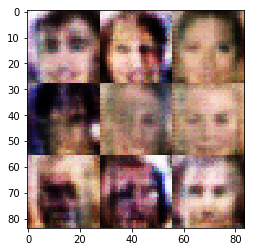

Step: 610: Epoch 1/1... Discriminator Loss: 2.5898... Generator Loss: 0.1443
Step: 620: Epoch 1/1... Discriminator Loss: 1.7184... Generator Loss: 0.3677
Step: 630: Epoch 1/1... Discriminator Loss: 2.3250... Generator Loss: 0.1852
Step: 640: Epoch 1/1... Discriminator Loss: 1.6828... Generator Loss: 3.5686
Step: 650: Epoch 1/1... Discriminator Loss: 2.1194... Generator Loss: 0.2098
Step: 660: Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.6463
Step: 670: Epoch 1/1... Discriminator Loss: 1.7223... Generator Loss: 0.3423
Step: 680: Epoch 1/1... Discriminator Loss: 0.8439... Generator Loss: 1.4463
Step: 690: Epoch 1/1... Discriminator Loss: 0.8758... Generator Loss: 2.1790
Step: 700: Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 1.0153
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


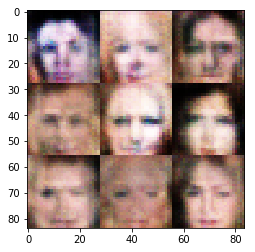

Step: 710: Epoch 1/1... Discriminator Loss: 0.8086... Generator Loss: 1.8179
Step: 720: Epoch 1/1... Discriminator Loss: 0.7835... Generator Loss: 1.5199
Step: 730: Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.6319
Step: 740: Epoch 1/1... Discriminator Loss: 1.0792... Generator Loss: 4.4901
Step: 750: Epoch 1/1... Discriminator Loss: 2.2349... Generator Loss: 0.2041
Step: 760: Epoch 1/1... Discriminator Loss: 1.4874... Generator Loss: 2.1226
Step: 770: Epoch 1/1... Discriminator Loss: 0.9281... Generator Loss: 1.6852
Step: 780: Epoch 1/1... Discriminator Loss: 0.8529... Generator Loss: 1.1663
Step: 790: Epoch 1/1... Discriminator Loss: 1.1763... Generator Loss: 0.7047
Step: 800: Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.5742
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


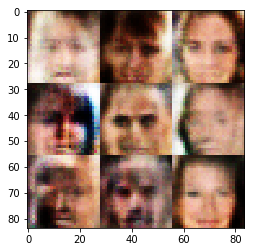

Step: 810: Epoch 1/1... Discriminator Loss: 2.3572... Generator Loss: 2.8434
Step: 820: Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 4.0265
Step: 830: Epoch 1/1... Discriminator Loss: 2.2744... Generator Loss: 0.1665
Step: 840: Epoch 1/1... Discriminator Loss: 0.7253... Generator Loss: 1.5518
Step: 850: Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.4793
Step: 860: Epoch 1/1... Discriminator Loss: 1.0810... Generator Loss: 0.8814
Step: 870: Epoch 1/1... Discriminator Loss: 0.8092... Generator Loss: 1.1497
Step: 880: Epoch 1/1... Discriminator Loss: 1.9355... Generator Loss: 0.2519
Step: 890: Epoch 1/1... Discriminator Loss: 2.1696... Generator Loss: 0.2439
Step: 900: Epoch 1/1... Discriminator Loss: 0.8119... Generator Loss: 2.5931
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


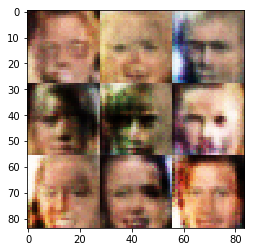

Step: 910: Epoch 1/1... Discriminator Loss: 4.3321... Generator Loss: 4.4385
Step: 920: Epoch 1/1... Discriminator Loss: 0.8699... Generator Loss: 2.5105
Step: 930: Epoch 1/1... Discriminator Loss: 0.6410... Generator Loss: 4.0595
Step: 940: Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.5742
Step: 950: Epoch 1/1... Discriminator Loss: 0.5237... Generator Loss: 2.1800
Step: 960: Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 3.1054
Step: 970: Epoch 1/1... Discriminator Loss: 0.6050... Generator Loss: 1.6770
Step: 980: Epoch 1/1... Discriminator Loss: 0.5584... Generator Loss: 1.9104
Step: 990: Epoch 1/1... Discriminator Loss: 0.4919... Generator Loss: 2.6709
Step: 1000: Epoch 1/1... Discriminator Loss: 2.5543... Generator Loss: 0.1785
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


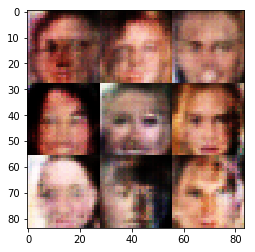

Step: 1010: Epoch 1/1... Discriminator Loss: 1.1214... Generator Loss: 2.3025
Step: 1020: Epoch 1/1... Discriminator Loss: 0.6124... Generator Loss: 2.5151
Step: 1030: Epoch 1/1... Discriminator Loss: 1.5843... Generator Loss: 1.2946
Step: 1040: Epoch 1/1... Discriminator Loss: 0.7485... Generator Loss: 2.8504
Step: 1050: Epoch 1/1... Discriminator Loss: 1.2101... Generator Loss: 3.5864
Step: 1060: Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 6.0324
Step: 1070: Epoch 1/1... Discriminator Loss: 0.6797... Generator Loss: 1.4360
Step: 1080: Epoch 1/1... Discriminator Loss: 0.6179... Generator Loss: 1.4917
Step: 1090: Epoch 1/1... Discriminator Loss: 1.4475... Generator Loss: 0.4400
Step: 1100: Epoch 1/1... Discriminator Loss: 0.8098... Generator Loss: 1.1300
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


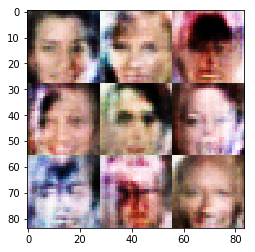

Step: 1110: Epoch 1/1... Discriminator Loss: 0.9939... Generator Loss: 0.9062
Step: 1120: Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.6494
Step: 1130: Epoch 1/1... Discriminator Loss: 0.7906... Generator Loss: 1.2234
Step: 1140: Epoch 1/1... Discriminator Loss: 1.1484... Generator Loss: 0.6775
Step: 1150: Epoch 1/1... Discriminator Loss: 1.8103... Generator Loss: 0.2890
Step: 1160: Epoch 1/1... Discriminator Loss: 0.6700... Generator Loss: 1.7020
Step: 1170: Epoch 1/1... Discriminator Loss: 0.9616... Generator Loss: 0.9779
Step: 1180: Epoch 1/1... Discriminator Loss: 1.2386... Generator Loss: 0.6209
Step: 1190: Epoch 1/1... Discriminator Loss: 1.7289... Generator Loss: 0.8714
Step: 1200: Epoch 1/1... Discriminator Loss: 0.7630... Generator Loss: 1.2727
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


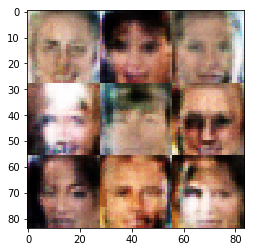

Step: 1210: Epoch 1/1... Discriminator Loss: 0.5249... Generator Loss: 3.1775
Step: 1220: Epoch 1/1... Discriminator Loss: 0.5627... Generator Loss: 2.7092
Step: 1230: Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 3.5219
Step: 1240: Epoch 1/1... Discriminator Loss: 1.0804... Generator Loss: 0.8223
Step: 1250: Epoch 1/1... Discriminator Loss: 0.8922... Generator Loss: 0.9749
Step: 1260: Epoch 1/1... Discriminator Loss: 0.5210... Generator Loss: 2.0473
Step: 1270: Epoch 1/1... Discriminator Loss: 1.9170... Generator Loss: 0.2446
Step: 1280: Epoch 1/1... Discriminator Loss: 0.7557... Generator Loss: 4.1099
Step: 1290: Epoch 1/1... Discriminator Loss: 0.4265... Generator Loss: 3.9434
Step: 1300: Epoch 1/1... Discriminator Loss: 0.7729... Generator Loss: 1.2044
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


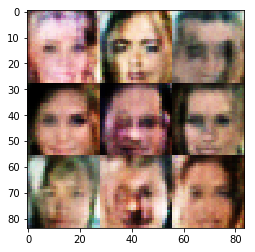

Step: 1310: Epoch 1/1... Discriminator Loss: 2.4042... Generator Loss: 1.7943
Step: 1320: Epoch 1/1... Discriminator Loss: 0.7307... Generator Loss: 3.2527
Step: 1330: Epoch 1/1... Discriminator Loss: 0.5149... Generator Loss: 6.0682
Step: 1340: Epoch 1/1... Discriminator Loss: 0.6082... Generator Loss: 1.6168
Step: 1350: Epoch 1/1... Discriminator Loss: 0.4562... Generator Loss: 2.7328
Step: 1360: Epoch 1/1... Discriminator Loss: 0.3975... Generator Loss: 2.9777
Step: 1370: Epoch 1/1... Discriminator Loss: 1.4501... Generator Loss: 0.4799
Step: 1380: Epoch 1/1... Discriminator Loss: 0.4251... Generator Loss: 3.5577
Step: 1390: Epoch 1/1... Discriminator Loss: 0.5950... Generator Loss: 6.9084
Step: 1400: Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 0.7032
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


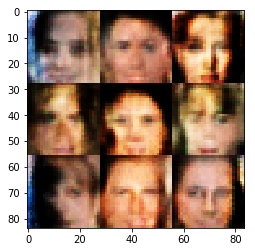

Step: 1410: Epoch 1/1... Discriminator Loss: 0.3549... Generator Loss: 5.2035
Step: 1420: Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.5620
Step: 1430: Epoch 1/1... Discriminator Loss: 0.9623... Generator Loss: 5.4938
Step: 1440: Epoch 1/1... Discriminator Loss: 0.7906... Generator Loss: 1.2664
Step: 1450: Epoch 1/1... Discriminator Loss: 0.4093... Generator Loss: 5.0917
Step: 1460: Epoch 1/1... Discriminator Loss: 0.3581... Generator Loss: 3.9292
Step: 1470: Epoch 1/1... Discriminator Loss: 1.0947... Generator Loss: 1.6474
Step: 1480: Epoch 1/1... Discriminator Loss: 0.4650... Generator Loss: 2.2746
Step: 1490: Epoch 1/1... Discriminator Loss: 0.8810... Generator Loss: 0.9917
Step: 1500: Epoch 1/1... Discriminator Loss: 0.9869... Generator Loss: 0.8148
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


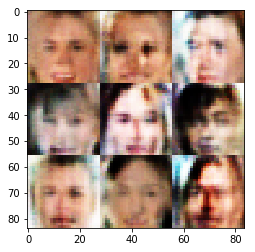

Step: 1510: Epoch 1/1... Discriminator Loss: 0.4216... Generator Loss: 3.4718
Step: 1520: Epoch 1/1... Discriminator Loss: 0.3670... Generator Loss: 3.9274
Step: 1530: Epoch 1/1... Discriminator Loss: 0.5651... Generator Loss: 2.1797
Step: 1540: Epoch 1/1... Discriminator Loss: 0.5915... Generator Loss: 6.0791
Step: 1550: Epoch 1/1... Discriminator Loss: 1.2246... Generator Loss: 0.6172
Step: 1560: Epoch 1/1... Discriminator Loss: 0.4812... Generator Loss: 2.3199
Step: 1570: Epoch 1/1... Discriminator Loss: 0.4129... Generator Loss: 3.0162
Step: 1580: Epoch 1/1... Discriminator Loss: 1.1843... Generator Loss: 0.7985
Step: 1590: Epoch 1/1... Discriminator Loss: 0.4362... Generator Loss: 2.6292
Step: 1600: Epoch 1/1... Discriminator Loss: 0.4075... Generator Loss: 3.1802
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


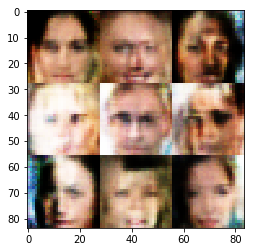

Step: 1610: Epoch 1/1... Discriminator Loss: 0.5501... Generator Loss: 5.5106
Step: 1620: Epoch 1/1... Discriminator Loss: 1.1871... Generator Loss: 0.6065
Step: 1630: Epoch 1/1... Discriminator Loss: 0.3675... Generator Loss: 3.5959
Step: 1640: Epoch 1/1... Discriminator Loss: 0.4521... Generator Loss: 6.1336
Step: 1650: Epoch 1/1... Discriminator Loss: 0.3869... Generator Loss: 6.1444
Step: 1660: Epoch 1/1... Discriminator Loss: 0.4602... Generator Loss: 2.5154
Step: 1670: Epoch 1/1... Discriminator Loss: 1.2760... Generator Loss: 0.7446
Step: 1680: Epoch 1/1... Discriminator Loss: 0.3735... Generator Loss: 3.8757
Step: 1690: Epoch 1/1... Discriminator Loss: 0.4646... Generator Loss: 2.5254
Step: 1700: Epoch 1/1... Discriminator Loss: 0.6926... Generator Loss: 1.3677
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


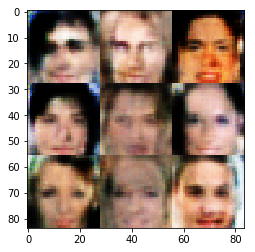

Step: 1710: Epoch 1/1... Discriminator Loss: 0.4408... Generator Loss: 5.4121
Step: 1720: Epoch 1/1... Discriminator Loss: 0.3690... Generator Loss: 3.7763
Step: 1730: Epoch 1/1... Discriminator Loss: 0.5859... Generator Loss: 3.6369
Step: 1740: Epoch 1/1... Discriminator Loss: 0.6003... Generator Loss: 1.8537
Step: 1750: Epoch 1/1... Discriminator Loss: 0.4250... Generator Loss: 2.9731
Step: 1760: Epoch 1/1... Discriminator Loss: 1.2702... Generator Loss: 7.2444
Step: 1770: Epoch 1/1... Discriminator Loss: 0.3451... Generator Loss: 5.3861
Step: 1780: Epoch 1/1... Discriminator Loss: 0.3746... Generator Loss: 4.3435
Step: 1790: Epoch 1/1... Discriminator Loss: 0.5555... Generator Loss: 3.1578
Step: 1800: Epoch 1/1... Discriminator Loss: 0.4071... Generator Loss: 5.1185
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


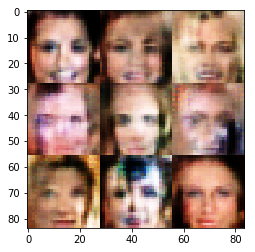

Step: 1810: Epoch 1/1... Discriminator Loss: 1.0557... Generator Loss: 3.5848
Step: 1820: Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.5877
Step: 1830: Epoch 1/1... Discriminator Loss: 0.6788... Generator Loss: 1.7682
Step: 1840: Epoch 1/1... Discriminator Loss: 0.8955... Generator Loss: 4.3203
Step: 1850: Epoch 1/1... Discriminator Loss: 0.3738... Generator Loss: 4.3070
Step: 1860: Epoch 1/1... Discriminator Loss: 0.5588... Generator Loss: 5.0900
Step: 1870: Epoch 1/1... Discriminator Loss: 0.4097... Generator Loss: 2.9863
Step: 1880: Epoch 1/1... Discriminator Loss: 0.3588... Generator Loss: 4.6410
Step: 1890: Epoch 1/1... Discriminator Loss: 0.7499... Generator Loss: 1.4295
Step: 1900: Epoch 1/1... Discriminator Loss: 0.9954... Generator Loss: 5.3540
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


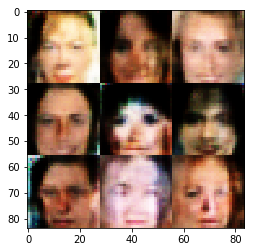

Step: 1910: Epoch 1/1... Discriminator Loss: 0.3857... Generator Loss: 3.7954
Step: 1920: Epoch 1/1... Discriminator Loss: 0.4141... Generator Loss: 4.2072
Step: 1930: Epoch 1/1... Discriminator Loss: 0.3910... Generator Loss: 3.7855
Step: 1940: Epoch 1/1... Discriminator Loss: 0.4006... Generator Loss: 4.2084
Step: 1950: Epoch 1/1... Discriminator Loss: 0.4660... Generator Loss: 4.1712
Step: 1960: Epoch 1/1... Discriminator Loss: 1.0254... Generator Loss: 0.9944
Step: 1970: Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.6063
Step: 1980: Epoch 1/1... Discriminator Loss: 0.5679... Generator Loss: 3.8369
Step: 1990: Epoch 1/1... Discriminator Loss: 0.3907... Generator Loss: 4.2816
Step: 2000: Epoch 1/1... Discriminator Loss: 0.5271... Generator Loss: 3.7220
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


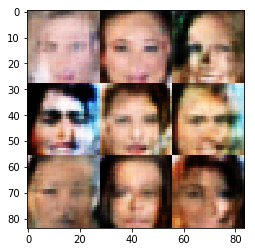

Step: 2010: Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 1.1173
Step: 2020: Epoch 1/1... Discriminator Loss: 0.6720... Generator Loss: 4.1920
Step: 2030: Epoch 1/1... Discriminator Loss: 0.4687... Generator Loss: 2.6402
Step: 2040: Epoch 1/1... Discriminator Loss: 0.4721... Generator Loss: 3.8307
Step: 2050: Epoch 1/1... Discriminator Loss: 0.3484... Generator Loss: 4.6951
Step: 2060: Epoch 1/1... Discriminator Loss: 2.9381... Generator Loss: 3.3342
Step: 2070: Epoch 1/1... Discriminator Loss: 0.5383... Generator Loss: 3.2818
Step: 2080: Epoch 1/1... Discriminator Loss: 0.5740... Generator Loss: 1.7818
Step: 2090: Epoch 1/1... Discriminator Loss: 0.5667... Generator Loss: 4.3281
Step: 2100: Epoch 1/1... Discriminator Loss: 0.5958... Generator Loss: 1.6386
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


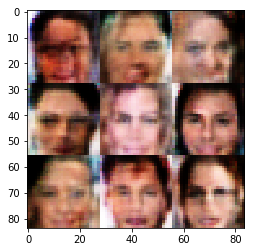

Step: 2110: Epoch 1/1... Discriminator Loss: 0.3990... Generator Loss: 3.0752
Step: 2120: Epoch 1/1... Discriminator Loss: 0.3888... Generator Loss: 3.3301
Step: 2130: Epoch 1/1... Discriminator Loss: 0.5159... Generator Loss: 2.4193
Step: 2140: Epoch 1/1... Discriminator Loss: 0.4314... Generator Loss: 2.7991
Step: 2150: Epoch 1/1... Discriminator Loss: 1.3630... Generator Loss: 0.5497
Step: 2160: Epoch 1/1... Discriminator Loss: 0.4141... Generator Loss: 3.6323
Step: 2170: Epoch 1/1... Discriminator Loss: 0.7245... Generator Loss: 6.0295
Step: 2180: Epoch 1/1... Discriminator Loss: 0.5615... Generator Loss: 3.1951
Step: 2190: Epoch 1/1... Discriminator Loss: 0.4085... Generator Loss: 3.3911
Step: 2200: Epoch 1/1... Discriminator Loss: 0.3549... Generator Loss: 5.0682
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


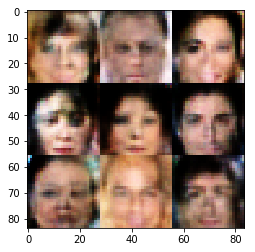

Step: 2210: Epoch 1/1... Discriminator Loss: 2.9505... Generator Loss: 3.2120
Step: 2220: Epoch 1/1... Discriminator Loss: 0.5086... Generator Loss: 3.5309
Step: 2230: Epoch 1/1... Discriminator Loss: 0.4578... Generator Loss: 2.6808
Step: 2240: Epoch 1/1... Discriminator Loss: 0.5912... Generator Loss: 1.6340
Step: 2250: Epoch 1/1... Discriminator Loss: 0.3676... Generator Loss: 4.3358
Step: 2260: Epoch 1/1... Discriminator Loss: 0.4722... Generator Loss: 2.6266
Step: 2270: Epoch 1/1... Discriminator Loss: 1.5709... Generator Loss: 0.4636
Step: 2280: Epoch 1/1... Discriminator Loss: 0.4913... Generator Loss: 2.4577
Step: 2290: Epoch 1/1... Discriminator Loss: 0.7963... Generator Loss: 3.7420
Step: 2300: Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 0.6039
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


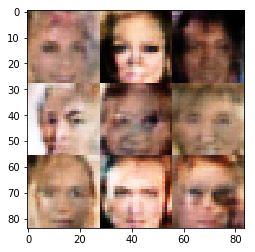

Step: 2310: Epoch 1/1... Discriminator Loss: 0.3681... Generator Loss: 4.0012
Step: 2320: Epoch 1/1... Discriminator Loss: 1.3113... Generator Loss: 0.5341
Step: 2330: Epoch 1/1... Discriminator Loss: 0.5035... Generator Loss: 2.2978
Step: 2340: Epoch 1/1... Discriminator Loss: 0.4454... Generator Loss: 4.8310
Step: 2350: Epoch 1/1... Discriminator Loss: 1.0400... Generator Loss: 2.2361
Step: 2360: Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.6810
Step: 2370: Epoch 1/1... Discriminator Loss: 0.4818... Generator Loss: 2.9840
Step: 2380: Epoch 1/1... Discriminator Loss: 0.3793... Generator Loss: 4.6529
Step: 2390: Epoch 1/1... Discriminator Loss: 0.4667... Generator Loss: 2.7377
Step: 2400: Epoch 1/1... Discriminator Loss: 1.1074... Generator Loss: 0.7768
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


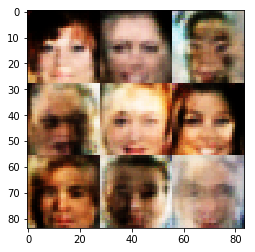

Step: 2410: Epoch 1/1... Discriminator Loss: 0.4350... Generator Loss: 2.6479
Step: 2420: Epoch 1/1... Discriminator Loss: 0.4110... Generator Loss: 2.9899
Step: 2430: Epoch 1/1... Discriminator Loss: 0.3938... Generator Loss: 3.2106
Step: 2440: Epoch 1/1... Discriminator Loss: 1.2256... Generator Loss: 0.9304
Step: 2450: Epoch 1/1... Discriminator Loss: 0.5547... Generator Loss: 2.0288
Step: 2460: Epoch 1/1... Discriminator Loss: 0.5026... Generator Loss: 2.1714
Step: 2470: Epoch 1/1... Discriminator Loss: 0.4593... Generator Loss: 2.5390
Step: 2480: Epoch 1/1... Discriminator Loss: 1.2155... Generator Loss: 0.6317
Step: 2490: Epoch 1/1... Discriminator Loss: 0.9822... Generator Loss: 1.2075
Step: 2500: Epoch 1/1... Discriminator Loss: 0.5969... Generator Loss: 2.0556
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


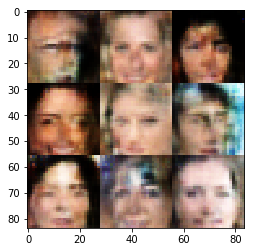

Step: 2510: Epoch 1/1... Discriminator Loss: 0.4107... Generator Loss: 3.1230
Step: 2520: Epoch 1/1... Discriminator Loss: 0.6879... Generator Loss: 1.4771
Step: 2530: Epoch 1/1... Discriminator Loss: 2.4400... Generator Loss: 3.8689
Step: 2540: Epoch 1/1... Discriminator Loss: 0.5601... Generator Loss: 2.3409
Step: 2550: Epoch 1/1... Discriminator Loss: 1.2792... Generator Loss: 0.6310
Step: 2560: Epoch 1/1... Discriminator Loss: 0.5757... Generator Loss: 2.0584
Step: 2570: Epoch 1/1... Discriminator Loss: 0.6658... Generator Loss: 1.6216
Step: 2580: Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 0.6717
Step: 2590: Epoch 1/1... Discriminator Loss: 0.5032... Generator Loss: 2.0849
Step: 2600: Epoch 1/1... Discriminator Loss: 0.4419... Generator Loss: 3.4566
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


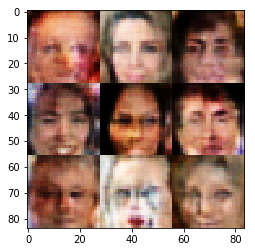

Step: 2610: Epoch 1/1... Discriminator Loss: 0.5855... Generator Loss: 1.6546
Step: 2620: Epoch 1/1... Discriminator Loss: 0.7047... Generator Loss: 1.9174
Step: 2630: Epoch 1/1... Discriminator Loss: 0.6904... Generator Loss: 2.2039
Step: 2640: Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 1.0164
Step: 2650: Epoch 1/1... Discriminator Loss: 0.5003... Generator Loss: 3.2279
Step: 2660: Epoch 1/1... Discriminator Loss: 0.3881... Generator Loss: 3.5011
Step: 2670: Epoch 1/1... Discriminator Loss: 0.5949... Generator Loss: 1.8329
Step: 2680: Epoch 1/1... Discriminator Loss: 2.0833... Generator Loss: 0.2267
Step: 2690: Epoch 1/1... Discriminator Loss: 0.5455... Generator Loss: 2.4875
Step: 2700: Epoch 1/1... Discriminator Loss: 0.6425... Generator Loss: 1.5390
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


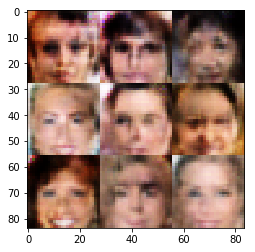

Step: 2710: Epoch 1/1... Discriminator Loss: 0.4960... Generator Loss: 2.5439
Step: 2720: Epoch 1/1... Discriminator Loss: 0.6433... Generator Loss: 1.5094
Step: 2730: Epoch 1/1... Discriminator Loss: 0.9905... Generator Loss: 0.9162
Step: 2740: Epoch 1/1... Discriminator Loss: 0.4540... Generator Loss: 2.5190
Step: 2750: Epoch 1/1... Discriminator Loss: 0.6553... Generator Loss: 1.5176
Step: 2760: Epoch 1/1... Discriminator Loss: 0.6620... Generator Loss: 1.5719
Step: 2770: Epoch 1/1... Discriminator Loss: 0.4399... Generator Loss: 3.0896
Step: 2780: Epoch 1/1... Discriminator Loss: 0.4793... Generator Loss: 3.3649
Step: 2790: Epoch 1/1... Discriminator Loss: 0.4475... Generator Loss: 2.6713
Step: 2800: Epoch 1/1... Discriminator Loss: 3.8336... Generator Loss: 4.5179
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


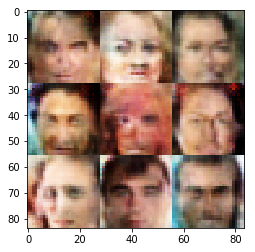

Step: 2810: Epoch 1/1... Discriminator Loss: 1.1051... Generator Loss: 3.0342
Step: 2820: Epoch 1/1... Discriminator Loss: 0.9468... Generator Loss: 0.9833
Step: 2830: Epoch 1/1... Discriminator Loss: 1.1211... Generator Loss: 0.8973
Step: 2840: Epoch 1/1... Discriminator Loss: 0.4882... Generator Loss: 2.7109
Step: 2850: Epoch 1/1... Discriminator Loss: 0.9861... Generator Loss: 1.0212
Step: 2860: Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 0.5739
Step: 2870: Epoch 1/1... Discriminator Loss: 1.1036... Generator Loss: 0.9868
Step: 2880: Epoch 1/1... Discriminator Loss: 0.7186... Generator Loss: 1.5624
Step: 2890: Epoch 1/1... Discriminator Loss: 0.5907... Generator Loss: 3.5478
Step: 2900: Epoch 1/1... Discriminator Loss: 0.8925... Generator Loss: 0.9294
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


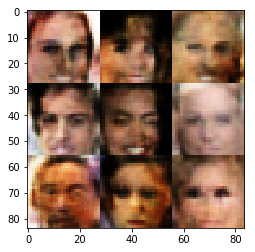

Step: 2910: Epoch 1/1... Discriminator Loss: 0.8750... Generator Loss: 4.0878
Step: 2920: Epoch 1/1... Discriminator Loss: 0.5232... Generator Loss: 2.2588
Step: 2930: Epoch 1/1... Discriminator Loss: 0.4794... Generator Loss: 3.2798
Step: 2940: Epoch 1/1... Discriminator Loss: 0.7284... Generator Loss: 1.4155
Step: 2950: Epoch 1/1... Discriminator Loss: 0.7537... Generator Loss: 1.4757
Step: 2960: Epoch 1/1... Discriminator Loss: 0.4773... Generator Loss: 2.4997
Step: 2970: Epoch 1/1... Discriminator Loss: 0.6777... Generator Loss: 1.6840
Step: 2980: Epoch 1/1... Discriminator Loss: 0.7075... Generator Loss: 1.3661
Step: 2990: Epoch 1/1... Discriminator Loss: 0.5783... Generator Loss: 1.9665
Step: 3000: Epoch 1/1... Discriminator Loss: 0.9701... Generator Loss: 3.3219
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


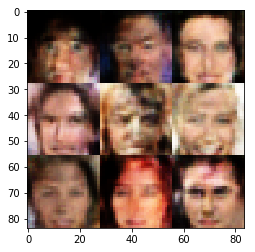

Step: 3010: Epoch 1/1... Discriminator Loss: 0.8056... Generator Loss: 2.1460
Step: 3020: Epoch 1/1... Discriminator Loss: 1.0524... Generator Loss: 3.3400
Step: 3030: Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 0.8426
Step: 3040: Epoch 1/1... Discriminator Loss: 1.2953... Generator Loss: 3.9694
Step: 3050: Epoch 1/1... Discriminator Loss: 1.0033... Generator Loss: 0.8599
Step: 3060: Epoch 1/1... Discriminator Loss: 0.9987... Generator Loss: 0.8092
Step: 3070: Epoch 1/1... Discriminator Loss: 0.6011... Generator Loss: 1.6944
Step: 3080: Epoch 1/1... Discriminator Loss: 0.8468... Generator Loss: 2.8260
Step: 3090: Epoch 1/1... Discriminator Loss: 0.7801... Generator Loss: 1.7964
Step: 3100: Epoch 1/1... Discriminator Loss: 1.0510... Generator Loss: 0.8688
(?, 7, 7, 512)
(?, 14, 14, 128)
(?, 28, 28, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)


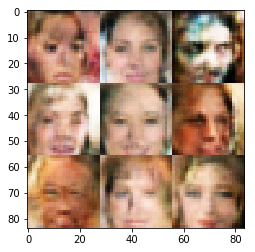

Step: 3110: Epoch 1/1... Discriminator Loss: 0.6260... Generator Loss: 1.8906
Step: 3120: Epoch 1/1... Discriminator Loss: 0.8935... Generator Loss: 1.1746
Step: 3130: Epoch 1/1... Discriminator Loss: 0.4337... Generator Loss: 2.9550
Step: 3140: Epoch 1/1... Discriminator Loss: 0.7102... Generator Loss: 1.4163
Step: 3150: Epoch 1/1... Discriminator Loss: 0.4676... Generator Loss: 2.4814
Step: 3160: Epoch 1/1... Discriminator Loss: 0.6286... Generator Loss: 1.6892
Finished with trainning


In [45]:
batch_size = 64
z_dim = 180
learning_rate = 0.0002
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.